Name: Srishti BINWANI


Course: Data Visualization - AIS S2

**Data Visualization of Global Cities Air Quality and Water Pollution Analysis**

This script analyzes and visualizes data about air quality and water pollution across cities worldwide.
The dataset contains information about:
- Air Quality Index (AQI): A measure from 0-100 where:
  * 0 means Severe pollution and 100 is Excellent air quality

- Water Pollution Index: A measure from 0-100 where:
  * 0 means Very Low pollution and 100 is a mark of Very High pollution


Dataset date: 18-10-2021

- The dataset is licensed under *CC0: Public Domain*, meaning it is free to use, modify, and distribute without restrictions.
- The data originates from Numbeo's global database, a collaborative platform where data is contributed by users worldwide
- The dataset represents environmental measurements from various cities, focusing on air quality and water pollution indices.

**Total Data Points:**
3,963 cities in total, 177 countries represented, 1,153 unique regions

**Geographic Coverage:**
Cities from all around the world, from which 425 cities have missing region information (10.7% of total)

**Based on the code and data analysis, here are the data types for each column in the dataset:**
-  City (object/string): Contains city names - Text data
            
-  Region (object/string):Contains region/state/province names - Text data - Contains 425 empty strings ("")
-  Country (object/string):Contains country names - Text data
-  AirQuality (float64):Numerical data - Range: 0.00 to 100.00 - Higher values indicate better air quality
-  WaterPollution (float64):Numerical data - Range: 0.00 to 100.00 - Higher values indicate worse pollution

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/cities_air_quality_water_pollution.18-10-2021.csv')

In [3]:
df.head(10)

,City,"""Region""","""Country""","""AirQuality""","""WaterPollution"""
0,New York City,"""New York""","""United States of America""",46.816038,49.504950
1,"Washington, D.C.","""District of Columbia""","""United States of America""",66.129032,49.107143
2,San Francisco,"""California""","""United States of America""",60.514019,43.000000
3,Berlin,"""""","""Germany""",62.364130,28.612717
4,Los Angeles,"""California""","""United States of America""",36.621622,61.299435
5,Bern,"""Canton of Bern""","""Switzerland""",94.318182,12.500000
6,Geneva,"""Canton of Geneva""","""Switzerland""",71.538462,17.372881
7,Zurich,"""Canton of Zurich""","""Switzerland""",83.809524,10.714286
8,Basel,"""""","""Switzerland""",81.666667,26.923077
9,London,"""England""","""United Kingdom""",37.042254,40.716374


In [4]:
df.columns = df.columns.str.strip().str.replace('"', '')

In [5]:
print("Available columns:", df.columns.tolist())

Available columns: ['City', 'Region', 'Country', 'AirQuality', 'WaterPollution']


In [6]:
print(f"Dataset Overview:")
print(f"Total number of cities: {len(df)}")
print(f"Average Air Quality Index: {df['AirQuality'].mean():.2f}")
print(f"Average Water Pollution Index: {df['WaterPollution'].mean():.2f}")
print(f"Number of countries represented: {df['Country'].nunique()}")

Dataset Overview:
Total number of cities: 3963
Average Air Quality Index: 62.25
Average Water Pollution Index: 44.64
Number of countries represented: 177


In [7]:
plt.style.use('seaborn')

In [8]:
print("\nValue counts in Region column:")
print(df['Region'].value_counts())


Value counts in Region column:
 ""                       425
 "England"                142
 "California"             122
 "Texas"                   51
 "Florida"                 48
                         ... 
 "Durango"                  1
 "Elbasan County"           1
 "Bar Municipality"         1
 "Korce County"             1
 "Diyarbakir Province"      1
Name: Region, Length: 1153, dtype: int64


**Are there any missing data ?**
- Yes there are 425 empty strings in the Region column


In [9]:
print("\nAir Quality Statistics:")
print(df['AirQuality'].describe())


Air Quality Statistics:
count    3963.000000
mean       62.253452
std        30.944753
min         0.000000
25%        37.686567
50%        69.444444
75%        87.500000
max       100.000000
Name: AirQuality, dtype: float64


**Visualization 1: Bar Graph** - Distribution of Cities by Air Quality Ranges
This visualization shows how many cities fall into each air quality category.
The Graph helps us conclude the following:
- Shows the overall distribution pattern of air quality across cities
- Identifies which air quality ranges are most common
- Highlights the number of cities in each category with exact values

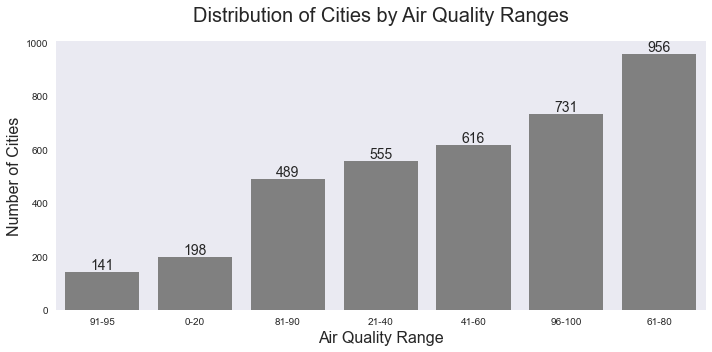

In [26]:
plt.figure(figsize=(10, 5))
ranges = [0, 20, 40, 60, 80, 90, 95, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-90', '91-95', '96-100']
air_quality_dist = pd.cut(df['AirQuality'], bins=ranges, labels=labels, right=True)
dist_counts = air_quality_dist.value_counts().sort_values(ascending=True)
ax = sns.barplot(x=dist_counts.index, y=dist_counts.values, color="Grey", order=dist_counts.index)
plt.title('Distribution of Cities by Air Quality Ranges', pad=20, fontsize=20)
#plt.xticks(rotation=45, fontsize=14)
plt.xlabel('Air Quality Range', fontsize=16)
plt.ylabel('Number of Cities', fontsize=16)
for i, v in enumerate(dist_counts.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=14)
ax.grid(False)
plt.tight_layout()
plt.show()

In [27]:
print("\nAnalysis: Distribution of Cities by Air Quality Ranges")
print("-" * 60)
bar_analysis = pd.DataFrame({
    'Range': labels,
    'Number of Cities': dist_counts.values,
    'Percentage': (dist_counts.values / len(df) * 100).round(2)
}).sort_values('Number of Cities', ascending=False)
print(bar_analysis.to_string(index=False))


Analysis: Distribution of Cities by Air Quality Ranges
------------------------------------------------------------
 Range  Number of Cities  Percentage
96-100               956       24.12
 91-95               731       18.45
 81-90               616       15.54
 61-80               555       14.00
 41-60               489       12.34
 21-40               198        5.00
  0-20               141        3.56


**Visualization 2: Scatter Plot** - Air Quality vs Water Pollution
This visualization explores the relationship between air quality and water pollution.
This helps us conclude the following:
- Each point represents a city and shows if there's a correlation between air and water pollution
- Helps identify cities with unusual combinations of air and water pollution
- Pattern indicates whether cities with good air quality tend to have better water quality

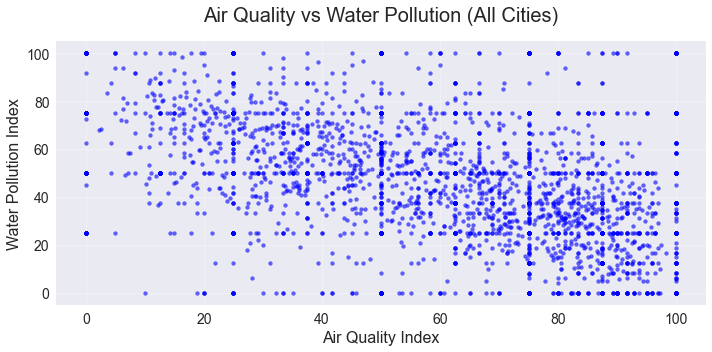

In [32]:
plt.figure(figsize=(10, 5))
plt.scatter(df['AirQuality'], df['WaterPollution'], 
           alpha=0.6,
           s=15,
           c='blue',
           marker='o')
plt.title('Air Quality vs Water Pollution (All Cities)', pad=20, fontsize=20)
plt.xlabel('Air Quality Index', fontsize=16)
plt.ylabel('Water Pollution Index', fontsize=16)
plt.grid(True, alpha=0.3)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.show()

In [33]:
print("\nAnalysis: Air Quality vs Water Pollution Correlation")
print("-" * 60)
correlation = df['AirQuality'].corr(df['WaterPollution'])
scatter_analysis = pd.DataFrame({
    'Metric': [
        'Correlation Coefficient',
        'Cities with High Air Quality (>80) & Low Water Pollution (<40)',
        'Cities with Poor Air Quality (<40) & High Water Pollution (>60)',
        'Average Water Pollution for Cities with Good Air Quality (>60)',
        'Average Water Pollution for Cities with Poor Air Quality (<40)'
    ],
    'Value': [
        f"{correlation:.3f}",
        len(df[(df['AirQuality'] > 80) & (df['WaterPollution'] < 40)]),
        len(df[(df['AirQuality'] < 40) & (df['WaterPollution'] > 60)]),
        f"{df[df['AirQuality'] > 60]['WaterPollution'].mean():.2f}",
        f"{df[df['AirQuality'] < 40]['WaterPollution'].mean():.2f}"
    ]
})
print(scatter_analysis.to_string(index=False))


Analysis: Air Quality vs Water Pollution Correlation
------------------------------------------------------------
                                                         Metric  Value
                                        Correlation Coefficient -0.454
 Cities with High Air Quality (>80) & Low Water Pollution (<40)    775
Cities with Poor Air Quality (<40) & High Water Pollution (>60)    447
 Average Water Pollution for Cities with Good Air Quality (>60)  35.97
 Average Water Pollution for Cities with Poor Air Quality (<40)  60.92


**Visualization 3: Histogram** - Distribution of Air Quality Index
This visualization shows the frequency distribution of air quality values.
Helps us conclude the following:
- Identifies the most common air quality ranges
- Includes mean and median lines to show central tendency
- Helps understand if air quality follows a normal distribution

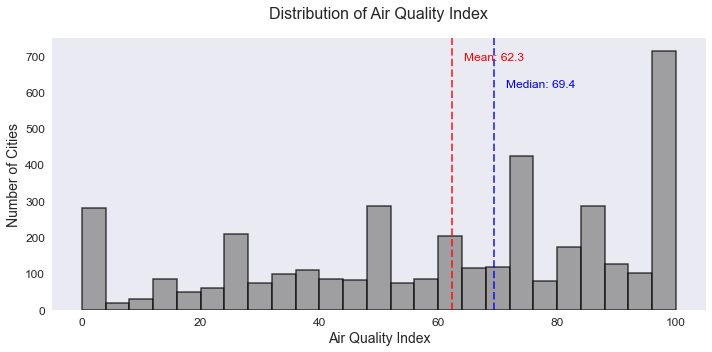

In [37]:
plt.figure(figsize=(10, 5))
n_bins = 25
plt.hist(df['AirQuality'], 
         bins=n_bins,
         edgecolor= 'black',
         color='Grey',
         alpha=0.7,
         linewidth=1.5)
plt.title('Distribution of Air Quality Index', fontsize=16, pad=20)
plt.xlabel('Air Quality Index', fontsize=14)
plt.ylabel('Number of Cities', fontsize=14)  
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(False)
mean_aqi = df['AirQuality'].mean()
median_aqi = df['AirQuality'].median()

plt.axvline(mean_aqi, color='red', linestyle='--', linewidth=2, alpha=0.7)
plt.axvline(median_aqi, color='blue', linestyle='--', linewidth=2, alpha=0.7)
plt.text(mean_aqi + 2, plt.ylim()[1]*0.95, f'Mean: {mean_aqi:.1f}', 
         color='red', fontsize=12, verticalalignment='top')
plt.text(median_aqi + 2, plt.ylim()[1]*0.85, f'Median: {median_aqi:.1f}', 
         color='blue', fontsize=12, verticalalignment='top')
plt.tight_layout(h_pad=4.0, w_pad=4.0)
plt.show() 

In [38]:
print("\nAnalysis: Air Quality Distribution Statistics")
print("-" * 60)
hist_analysis = pd.DataFrame({
    'Metric': [
        'Mean Air Quality',
        'Median Air Quality',
        'Standard Deviation',
        'Skewness',
        'Skewness Interpretation',
        'Cities Above Average',
        'Cities Below Average',
        'Most Common Range'
    ],
    'Value': [
        f"{mean_aqi:.2f}",
        f"{median_aqi:.2f}",
        f"{df['AirQuality'].std():.2f}",
        f"{df['AirQuality'].skew():.2f}",
        "Negative skew: More cities have higher air quality than lower" if df['AirQuality'].skew() < 0 
        else "Positive skew: More cities have lower air quality than higher" if df['AirQuality'].skew() > 0 
        else "No skew: Symmetric distribution",
        f"{len(df[df['AirQuality'] > mean_aqi])} ({len(df[df['AirQuality'] > mean_aqi])/len(df)*100:.1f}%)",
        f"{len(df[df['AirQuality'] <= mean_aqi])} ({len(df[df['AirQuality'] <= mean_aqi])/len(df)*100:.1f}%)",
        f"{air_quality_dist.value_counts().index[0]}"
    ]
})
print(hist_analysis.to_string(index=False))


Analysis: Air Quality Distribution Statistics
------------------------------------------------------------
                 Metric                                                         Value
       Mean Air Quality                                                         62.25
     Median Air Quality                                                         69.44
     Standard Deviation                                                         30.94
               Skewness                                                         -0.52
Skewness Interpretation Negative skew: More cities have higher air quality than lower
   Cities Above Average                                                  2287 (57.7%)
   Cities Below Average                                                  1676 (42.3%)
      Most Common Range                                                         61-80


**Skewness measures the asymmetry of the data distribution:**
- Negative skewness (< 0): The distribution has a longer tail on the left side. This means there are more cities with high air quality and fewer outliers with poor air quality.
- Positive skewness (> 0): The distribution has a longer tail on the right side. This means there are more cities with low air quality and fewer outliers with excellent air quality.
- Zero skewness (= 0): The distribution is perfectly symmetric.


**Visualization 4: Bar Chart** - Water And Air Quality Level Distribution
This visualization shows the proportion of cities and their water and air quality category, where 1 is Worst and 5 is Best. (In range (0-100))

Helps us conclude the following:
- Shows the relative distribution of air and water quality levels
- Helps identify what proportion of cities that require pollution control strategies.

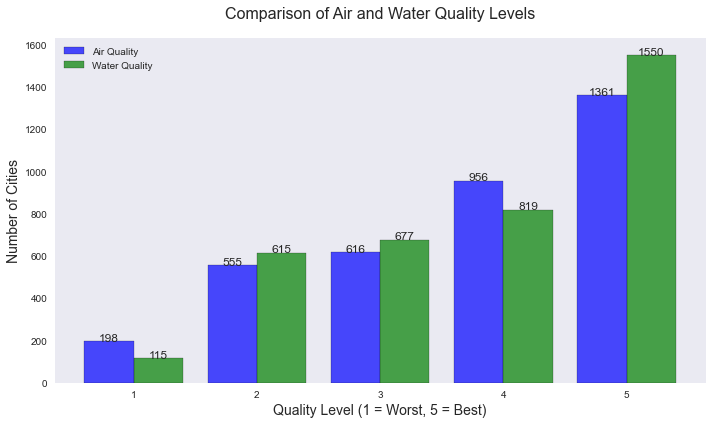

In [96]:
bins = [0, 20, 40, 60, 80, 100]
labels = [1, 2, 3, 4, 5]

df['WaterQuality'] = 100 - df['WaterPollution']


df['AirQuality_Category'] = pd.cut(df['AirQuality'], bins=bins, labels=labels, right=True)
df['WaterQuality_Category'] = pd.cut(df['WaterQuality'], bins=bins, labels=labels, right=True)


air_counts = df['AirQuality_Category'].value_counts().sort_index()
water_counts = df['WaterQuality_Category'].value_counts().sort_index()


air_counts_sorted = air_counts.sort_values(ascending=True)
water_counts_sorted = water_counts.sort_values(ascending=True)
avg_air_quality_sorted = avg_air_quality.sort_values(ascending=True)
avg_water_quality_sorted = avg_water_quality.sort_values(ascending=True)

plt.figure(figsize=(10, 6))

bar_width = 0.4
x = np.arange(len(labels))  
plt.bar(x - bar_width/2, air_counts_sorted, width=bar_width, label='Air Quality', color='blue', edgecolor='black', alpha=0.7)
plt.bar(x + bar_width/2, water_counts_sorted, width=bar_width, label='Water Quality', color='green', edgecolor='black', alpha=0.7)

plt.xticks(x, labels)
plt.xlabel('Quality Level (1 = Worst, 5 = Best)', fontsize=14)
plt.ylabel('Number of Cities', fontsize=14)
plt.title('Comparison of Air and Water Quality Levels', fontsize=16, pad=20)

for i in range(len(labels)):
    plt.text(x[i] - bar_width/2, air_counts_sorted.iloc[i] + 0.5, str(air_counts_sorted.iloc[i]), ha='center', fontsize=12)
    plt.text(x[i] + bar_width/2, water_counts_sorted.iloc[i] + 0.5, str(water_counts_sorted.iloc[i]), ha='center', fontsize=12)

plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()


In [76]:
quality_comparison_df = pd.DataFrame({
    'Quality Level': labels,
    #'Count of all the cities at ths Air Quality level': air_counts_sorted.values,
    #'Count of all the cities at ths Water Quality level': water_counts_sorted.values,
    'Average Air Quality at this level': avg_air_quality_sorted.values.round(2),
    'Average Water Quality at this level': avg_water_quality_sorted.values.round(2)
})

print(quality_comparison_df.to_string(index=False))


 Quality Level  Average Air Quality at this level  Average Water Quality at this level
             1                              13.44                                13.00
             2                              30.02                                29.32
             3                              50.50                                50.11
             4                              71.33                                70.25
             5                              94.11                                95.53


In [94]:
print(df[['WaterQuality', 'WaterQuality_Category']].head(10))

   WaterQuality WaterQuality_Category
0     50.495050                     3
1     50.892857                     3
2     57.000000                     3
3     71.387283                     4
4     38.700565                     2
5     87.500000                     5
6     82.627119                     5
7     89.285714                     5
8     73.076923                     4
9     59.283626                     3


**CONCLUSION**

In [95]:
print("\nKey Findings Summary:")
print("-" * 60)
print(f"1. Most cities ({bar_analysis.iloc[0]['Number of Cities']} cities, {bar_analysis.iloc[0]['Percentage']}%) have air quality in the {bar_analysis.iloc[0]['Range']} range")
print(f"2. The correlation between air quality and water pollution is {correlation:.3f}")
print(f"3. Average air quality across all cities is {mean_aqi:.2f}")
print(f"5. {len(df[(df['AirQuality'] > 80) & (df['WaterPollution'] < 20)])} cities have both high air quality (>80) and low water pollution (<20)") 


Key Findings Summary:
------------------------------------------------------------
1. Most cities (956 cities, 24.12%) have air quality in the 96-100 range
2. The correlation between air quality and water pollution is -0.454
3. Average air quality across all cities is 62.25
5. 456 cities have both high air quality (>80) and low water pollution (<20)
